In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')



In [25]:
iphone_reviews=[]

In [26]:
for i in range(1,51):

  op = []
  url = 'https://www.amazon.in/product-reviews/B0CHX68YG9/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar'+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")
  reviews = soup.findAll('span',attrs= {"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  iphone_reviews = iphone_reviews+op

In [27]:
iphone_reviews

['\nIt’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand appeal of Apple is fabulous. Camera is the best, performance is over the top…really fast and the games you can play are of play station’s…can any other phone do that…also the video quality is very nice…\n',
 '',
 '\nLightning fast,titanium tantrums\n',
 '\nFast charging\n',
 '\nPerformance very strong Charging\n',
 '\nThis is my 1 st pro iPhone. And so far I’m really impressed with the performance and simplicity of the product.\n',
 '\nbest iphone ever used\n',
 '\nBattery 10/10Cemra 10/10Performance 10/10Disign 10/10Display 10/10Agar pese hai to isse Badiya phone nahi hai market ne Phil haal\n',
 "\nI have purchased natural titanium and it's really awesome. My first phone purchased with my hardwork.\n",
 '\nNo heating issue till now running well with the new software update I have installed lots of apps and the ph is running well\n',
 '\nIt’s a fantastic phone…the feel and comfort in hand 

In [28]:
reviews = ' '.join(iphone_reviews)

In [29]:
reviews=reviews.lower()
reviews

"\nit’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand appeal of apple is fabulous. camera is the best, performance is over the top…really fast and the games you can play are of play station’s…can any other phone do that…also the video quality is very nice…\n  \nlightning fast,titanium tantrums\n \nfast charging\n \nperformance very strong charging\n \nthis is my 1 st pro iphone. and so far i’m really impressed with the performance and simplicity of the product.\n \nbest iphone ever used\n \nbattery 10/10cemra 10/10performance 10/10disign 10/10display 10/10agar pese hai to isse badiya phone nahi hai market ne phil haal\n \ni have purchased natural titanium and it's really awesome. my first phone purchased with my hardwork.\n \nno heating issue till now running well with the new software update i have installed lots of apps and the ph is running well\n \nit’s a fantastic phone…the feel and comfort in hand is awesome…looks stunning…also the brand 

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.tokenize import word_tokenize
reviews_token = word_tokenize(reviews)

In [34]:
from nltk.corpus import stopwords
reviews_no_stopwords = [w for w in reviews_token if not w in stopwords.words()]

In [35]:
reviews_no_stopwords

['’',
 'fantastic',
 'phone…the',
 'feel',
 'comfort',
 'hand',
 'awesome…looks',
 'stunning…also',
 'brand',
 'appeal',
 'apple',
 'fabulous',
 '.',
 'camera',
 ',',
 'performance',
 'top…really',
 'fast',
 'games',
 'play',
 'play',
 'station',
 '’',
 's…can',
 'phone',
 'that…also',
 'video',
 'quality',
 'nice…',
 'lightning',
 'fast',
 ',',
 'titanium',
 'tantrums',
 'fast',
 'charging',
 'performance',
 'strong',
 'charging',
 '1',
 'st',
 'pro',
 'iphone',
 '.',
 '’',
 'impressed',
 'performance',
 'simplicity',
 'product',
 '.',
 'iphone',
 'battery',
 '10/10cemra',
 '10/10performance',
 '10/10disign',
 '10/10display',
 '10/10agar',
 'pese',
 'badiya',
 'phone',
 'market',
 'phil',
 'haal',
 'purchased',
 'natural',
 'titanium',
 "'s",
 'awesome',
 '.',
 'phone',
 'purchased',
 'hardwork',
 '.',
 'heating',
 'issue',
 'running',
 'software',
 'update',
 'installed',
 'lots',
 'apps',
 'ph',
 'running',
 '’',
 'fantastic',
 'phone…the',
 'feel',
 'comfort',
 'hand',
 'awesome…lo

In [36]:
reviews = ' '.join(reviews_no_stopwords)
reviews

"’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10display 10/10agar pese badiya phone market phil haal purchased natural titanium 's awesome . phone purchased hardwork . heating issue running software update installed lots apps ph running ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10disp

word cloud visualization

In [37]:
def plot_cloud(wordcloud):
  plt.figure(figure=(60,40))
  plt.imshow(wordcloud)
  plt.axis('off')

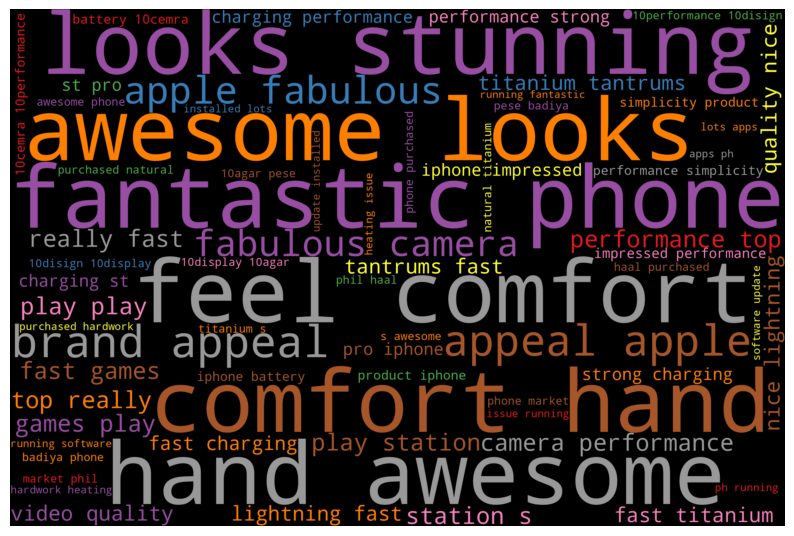

In [38]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color='black',
                      max_words=70,
                      colormap='Set1',
                      stopwords=STOPWORDS).generate(reviews)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
reviews1 = reviews
reviews1[0:1000]

"’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10display 10/10agar pese badiya phone market phil haal purchased natural titanium 's awesome . phone purchased hardwork . heating issue running software update installed lots apps ph running ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10disp

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [41]:
one_block = reviews1[0:1000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent',jupyter=True)

In [43]:
one_block


"’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10display 10/10agar pese badiya phone market phil haal purchased natural titanium 's awesome . phone purchased hardwork . heating issue running software update installed lots apps ph running ’ fantastic phone…the feel comfort hand awesome…looks stunning…also brand appeal apple fabulous . camera , performance top…really fast games play play station ’ s…can phone that…also video quality nice… lightning fast , titanium tantrums fast charging performance strong charging 1 st pro iphone . ’ impressed performance simplicity product . iphone battery 10/10cemra 10/10performance 10/10disign 10/10disp

In [45]:
from google.colab import files
upliaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [46]:
nw = pd.read_csv('negative-words.txt', error_bad_lines=False, encoding='latin-1')
nw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [48]:
from google.colab import files
upliaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [49]:
pw = pd.read_csv('positive-words.txt', error_bad_lines=False, encoding='latin-1')
pw

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [50]:
pw =pw.iloc[25:]
pw =pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
pw.reset_index(inplace=True)
pw =pw.drop('index',axis=1)
pw['Score'] = 1
pw

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [51]:
nw = nw.iloc[25:]
nw = nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
nw.reset_index(inplace=True)
nw = nw.drop('index',axis=1)
nw['Score'] = -1
nw

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [52]:
positive = len(pw)

In [53]:
negative = len(pw)

In [54]:
totals = len(reviews)

In [55]:
print('positive reviews:',positive/totals)

positive reviews: 0.0770146274043076


In [56]:
print('negative reviews:',positive/totals)

negative reviews: 0.0770146274043076


vabder lexicon

In [57]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [60]:
sia.polarity_scores(reviews)

{'neg': 0.027, 'neu': 0.649, 'pos': 0.324, 'compound': 1.0}

In [62]:
def get_vader_sentiment(review):
  sia = SentimentIntensityAnalyzer()

  analysis = sia.polarity_scores(review)

  if analysis['compound']>0:
    return 'positive sentiment'
  elif analysis['compound']<0:
    return 'negative sentiment'
  else:
    return 'neutral'

In [63]:
get_vader_sentiment(reviews)

'positive sentiment'